# Traing And Testing Available Data
---

**We have a dataset containing prices of used BMW cars. We are going to analyze this dataset and build a prediction function that can predict a price by taking mileage and age of the car as input. We will use sklearn `train_test_split` method to split training and testing dataset**

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('/kaggle/input/carprices/carprices.csv')
df = df.drop('Car Model', axis = 'columns')

df.head()

,Mileage,Sell Price($),Age(yrs)
0,69000,18000,6
1,35000,34000,3
2,57000,26100,5
3,22500,40000,2
4,46000,31500,4


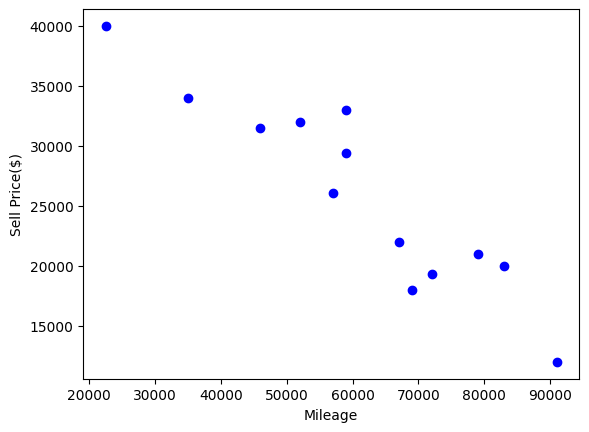

In [6]:
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(df['Mileage'], df['Sell Price($)'], color= 'blue', marker= 'o')

plt.show()

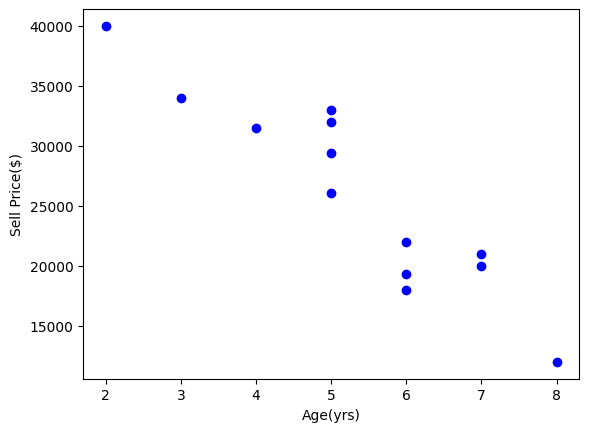

In [7]:
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.scatter(df['Age(yrs)'], df['Sell Price($)'], color= 'blue', marker= 'o')

plt.show()

Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)

The approach we are going to use here is to split available data in two sets

1. Training: We will train our model on this dataset
2. Testing: We will use this subset to make actual predictions using trained model

The reason we don't use same training set for testing is because our model has seen those sample before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam as you tought the students in the class

In [8]:
X = df[['Mileage','Age(yrs)']]

y = df['Sell Price($)']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 124)

In [10]:
X_train

,Mileage,Age(yrs)
3,22500,2
5,59000,5
6,52000,5
10,83000,7
4,46000,4
0,69000,6
2,57000,5
7,72000,6
1,35000,3
12,59000,5


In [11]:
X_test

,Mileage,Age(yrs)
9,67000,6
8,91000,8
11,79000,7


In [12]:
y_train

3     40000
5     29400
6     32000
10    20000
4     31500
0     18000
2     26100
7     19300
1     34000
12    33000
Name: Sell Price($), dtype: int64

In [13]:
y_test

9     22000
8     12000
11    21000
Name: Sell Price($), dtype: int64

In [14]:
from sklearn.linear_model import LinearRegression

le = LinearRegression()
le.fit(X_train, y_train)


LinearRegression()

In [15]:
le.predict(X_test)

array([24438.57119086, 15670.78040934, 20054.6758001 ])

In [16]:
y_test

9     22000
8     12000
11    21000
Name: Sell Price($), dtype: int64

In [17]:
le.score(X_test, y_test)

0.6651390751197273